In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Learning and Metrics<!-- requirement: images/matrix.svg -->

## Supervised machine learning

For this and all other machine-learning setups, 

$$X = \{X_{ji}\}$$

is an $n \times p$ matrix of features ($1 \le j \le n$ and $1 \le i \le p$) and 

$$y_j$$

is an $n$-vector of labels.  In all **supervised** learning problems, we are trying to build a **model** $f$ (predictive relationship) that maps the feature rows $\{X_{j \cdot}\}$ to each label $y_j$ so that 

$$f(X_{j \cdot}) \approx y_j.$$

With this predictive model, we will be able to predict the label associated with a new feature row $\tilde X_{j \cdot}$ via $f(\tilde X_{j \cdot})$.  That's it.

![Feature matrix](images/matrix.svg)

A few key concepts:
1. Within Supervised machine learning, there are roughly two broad classes of problems, **Regression** and **Classification**.  Regression is when the values of $y$ are continuous and real-valued.  Classification is when $y$ takes on a discrete discrete number of possible values.
1. What does it mean for the prediction to be accurate?  That depends on what **metric** we use, which is at the discretion of the modeler.  Obviously, some metrics make sense for regression, and others for classification.

**Question:** 
1. What are some examples of classification versus regression problems or algorithms?
1. These are all examples of supervised learning problems or algorithms.  Do you know of an example of an unsupervised learning problem or algorithm?

## Metrics for regression

**Sum of Squared Error** is the usual metric:

$$ \sum_j \left[f(X_{j \cdot}) - y_j\right]^2. $$

It is easier to differentiable, but more sensitive to the outliers 

Unfortunately, this is susceptible to outliers. When this is an issue, **Absolute Error** can be better:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

You've probably heard of **$R^2$** or the **Coefficient of Determination**. Although it's usually defined in a linear regression context, it's actually a very general idea: it measure the fraction of the error explained by the model $f$ versus the fraction of the error explained by a naive model that assumes the mean value of $y$ (i.e. the variance of $y$):

$$ 1 - \dfrac{\sum_j \left[f(X_{j \cdot}) - y_j\right]^2}{\sum_j \left(\overline y - y_j\right)^2} \qquad \mbox{where} \qquad \overline y = \frac{1}{n}\sum_j y_j \,.$$

**Questions:**

1. For a list of scalar values $z_1,\ldots,z_n$, the **mean** $\overline z$ is the quantity that minimizes the squared error:
 $$ \frac{d}{dz} \sum_j \left|z - z_j\right|^2 = 0$$
 $$ \frac{d}{dz} \left(Nz^2 - 2z(z_1 + z_2 + ...) + z_1^2 + z_2^2 + ...\right) = 0$$
 $$ 2Nz - 2(z_1 + z_2 + z_3 + ...) = 0$$

 $$ z = \frac{z_1 + z_2 + z_3 + ...}{N} = \overline z$$

 Do you know what quantity comes from minimizing the absolute error?
 $$ \mbox{argmin}_z \sum_j \left|z - z_j\right| $$
 Does this help explain why Absolute Error is less susceptible to outliers?
 
 - $\textbf{median}$
1. How does each of these metrics scale as you scale the labels ($y$'s) in our data set?

In [3]:
# Here are those metrics in scikit learn

from sklearn import metrics
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

random.seed(42)

y_obs  = 2*random.randn(10)
y_pred = y_obs + .1 * random.randn(10)

print "Mean Absolute Error:", metrics.mean_absolute_error(y_obs, y_pred)
print "Mean Squared Error:", metrics.mean_squared_error(y_obs, y_pred)
print "R^2:", metrics.r2_score(y_obs, y_pred)

 Mean Absolute Error: 0.0901900155415
Mean Squared Error: 0.0113860437222
R^2: 0.993949604835


## Metrics for classification

There are a plethora of metrics for classification and they depend on whether the predictions are given in terms of the potential label classes or probabilities.

### Metrics for class predictions

Let's start with the simplest.

Recall this well-known table

|                     | Observation Positive     | Observation Negative    |
|---------------------|:------------------------:|:-----------------------:|
| Prediction Positive |     True Positive        | False Positive (Type I) |
| Prediction Negative | False Negative (Type II) |     True Negative       |

There are many summary statistics one can compute from this table:
1. The **Accuracy** gives the fraction labels correctly predicted (True Positives and True Negatives over everything).  
1. The **Hamming Loss** gives the fraction of labels incorrectly predicted.  It is 1 - Accuracy.
1. The **Precision** is true positives divided by all positive *predictions*
1. The **Recall** is true positives divided by all positive *observations*.
1. There is also **F-beta** score which gives a weighted geometric average between the precision and recall (as a function of $\beta$) and the **F-1** score is the special case when $\beta = 1$.
1. The **Jaccard Similarity Coefficient** is in general the intersection of the predicted and actual label set divided by the union. This is equivalent to the accuracy score for most classification problems.

**Question:**
1. What's the interpretation of precision or recall?  When would you want each?  Is Harvard's admission's process high precision or high recall? 

From the Harvard addmission point of view, we want high precision, because we want all the students we offer offers are good students. While we cannot let all good students come to Harvard, so low recall.

What about Sir Blackstone's aphorism "Better that ten guilty persons escape than that one innocent suffer" with Captain Louis Renault's order to "Round up the Usual Suspects" in the film "Casablanca"?

High Recall

In [4]:
# Accuracy and Hamming distnace:

y_obs  = [0, 0, 1, 1, 0, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0, 0, 1]

print "Accuracy:", metrics.accuracy_score(y_obs, y_pred)
print "Hamming Loss:", metrics.hamming_loss(y_obs, y_pred)
print "Precision:", metrics.precision_score(y_obs, y_pred)
print "Recall:", metrics.recall_score(y_obs, y_pred)
print "F1:", metrics.f1_score(y_obs, y_pred)
print "Jaccard:", metrics.jaccard_similarity_score(y_obs, y_pred)

Accuracy: 0.875
Hamming Loss: 0.125
Precision: 1.0
Recall: 0.75
F1: 0.857142857143
Jaccard: 0.875


In [5]:
# summary report
# http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
from sklearn.metrics import classification_report
print classification_report(y_obs, y_pred)

             precision    recall  f1-score   support

          0       0.80      1.00      0.89         4
          1       1.00      0.75      0.86         4

avg / total       0.90      0.88      0.87         8



## Metrics for probabilistic predictions

## Precision-recall tradeoff

When the predictions are in terms of probabilities, we have a different set of metrics.  Then the above metrics are not well defined.  However, there is an implicit tradeoff between the two.

Let us take the two-class example where each $y_j$ is either positive (1) or negative (0) and we make a probabilistic prediction $p_j$.  A reasonable solution would be to choose a **threshold** $\underline p$ such that $p_j > \underline p$ is a Positive Prediction and $p_j \le \underline p$ is a negative one.  Hence, for every choice of $p_j$, we can compute a precision and a recall.  Varying $\underline p$ creates a family (or curve) of Precision Recall pairs.

**Questions:** 
1. How does increasing $\underline p$ affect the Precision or Recall?  What assumption do you have to make in order to answer this?
1. How does the curve vary depending on the quality of the estimator $f$ that produces the predictions $p_j$.  What if the estimator were perfect?  What if it were guessing at random?
1. What if $f$ were a reasonably good estimator but you used $1-f$ as your estimator?
1. How do you decide how to make the tradeoff between precision and recall?  How does this relate to the cost of a false positive versus false negative?

In [6]:
random.seed(42)
x = np.r_[0:1:1000j]
y = random.binomial(1, x)

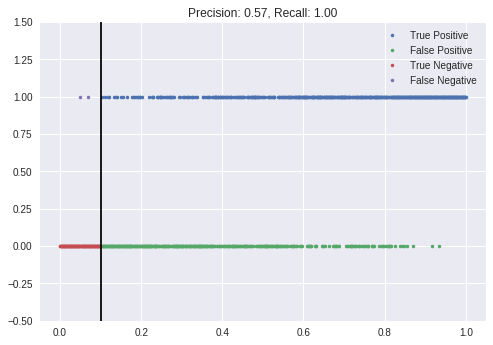

In [7]:
from ipywidgets import interact

def plot_threshold(threshold=0.5):
    true_pos = (x > threshold) * (y > 0)
    plt.plot(x[true_pos], y[true_pos], '.', label="True Positive")
    false_pos = (x > threshold) * (y == 0)
    plt.plot(x[false_pos], y[false_pos], '.', label="False Positive")
    true_neg = (x <= threshold) * (y == 0)
    plt.plot(x[true_neg], y[true_neg], '.', label="True Negative")
    false_neg = (x <= threshold) * (y > 0)
    plt.plot(x[false_neg], y[false_neg], '.', label="False Negative")
    plt.axvline(threshold, c='k')
    plt.ylim(-0.5, 1.5)
    plt.legend()
    
    try:
        precision = 1.0 * sum(true_pos) / (sum(true_pos) + sum(false_pos))
    except ZeroDivisionError:
        precision = 1
    recall = 1.0 * sum(true_pos) / (sum(true_pos) + sum(false_neg))
    plt.title('Precision: %0.2f, Recall: %0.2f' % (precision, recall))
    
interact(plot_threshold, threshold=(0, 1, 0.1))

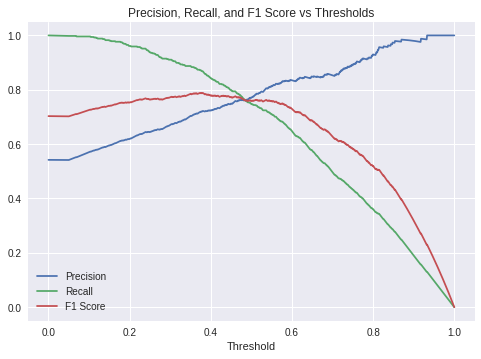

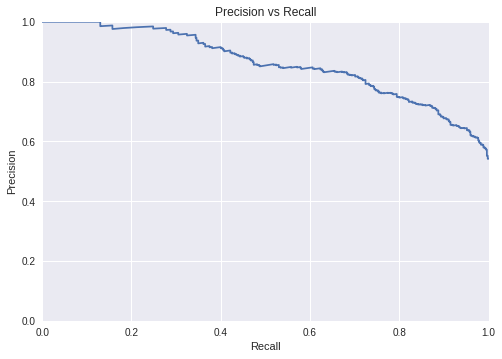

In [8]:
# compute the relevant stats
precisions, recalls, thresholds = metrics.precision_recall_curve(y, x)
thresholds = np.hstack([[0.], thresholds])  # n precisions but n-1 thresholds
f1s = 2 * (precisions * recalls) / (precisions + recalls)

fig = plt.figure()
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.legend(loc='lower left')
plt.xlabel("Threshold"); plt.ylabel(" ")
plt.title("Precision, Recall, and F1 Score vs Thresholds")
    
fig = plt.figure()
plt.plot(recalls, precisions)
#plt.fill_between(recalls, precisions, alpha=0.2)  # AUC value
plt.xlim([0., 1.]); plt.ylim([0., 1.])
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision vs Recall")

Given that we have a precision and recall tradeoff for probabilistic estimators, we usually report statistics like "Precision at .6", which means "Precision when the threshold is set at Recall=.6" and vice versa for "Recall at .8".

**Question**:
1. There's a tradeoff between Precision and Recall.  When would you want a high precision process?  When would you want a high recall process?  Which would you use for Email Spam detection?  What about Drug approvals?
1. Let's suppose the NSA has an estimator for "likely to be a terrorist" which they use to determine who should be surveilled.  How do enhanced national security versus fourth-amendment protections map onto precision and recall?

### Single-valued Probabilistic Prediction Metrics

While a modeler can decide the appropriate threshold once given a precision-recall curve, it is hard to optimize for and it doesn't necessarily make sense to optimize for "Precision at .6" (why not "Precision at .7"?).  We need a single-valued metric that is independent of threshold.  Fortunately, there are two common ones:

1. The **Area under the Curve** or **AUC** computes the area under the Precision Recall curve.
1. There is a **Receiver Operating Charateristic**, which is similar to the Precision-Recall curve.  The area under this curve is itself a metric called **ROC-AUC**.  The definition isn't hard, but it's beyond the scope of this course.  You can find out more [on Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) or develop some geometric intuition from this [blog post](https://shapeofdata.wordpress.com/2015/01/05/precision-recall-aucs-and-rocs/).
1. The **Log-Loss** or **Entropy** is another characteristic.  It is related to the notion of Entropy in Thermodynamics and Shannon-Entropy.  For a binary class problem where $y_j$ is either $0$ or $1$, it is given by

$$ - \sum_j \left[y_j \log(p_j) + (1-y_j) \log(1-p_j)\right] $$

Check https://en.wikipedia.org/wiki/Entropy_(information_theory)

**Question:** 
1. Can you generalize entropy formula from a two-class metric to an $m$-class metric?  What about for the other metrics?
1. In Scikit Learn, `metrics.auc` computes AUC form the precision and recall numbers while `metrics.average_precision_score` computes AUC directly from observations and predictions.  Why is average precision the same as AUC?

In [9]:
# AUC, ROC-AUC, Log-loss

# for entropy, we need the predictions and observations by-class
# e.g. two columns for a binomial prediction.
x_full = np.vstack([x, 1-x]).T
y_full = np.vstack([y, 1-y]).T

# You can compute AUC either via the AUC function by the average_precision_score
print "AUC by hand:", metrics.auc(recalls, precisions)
print "AUC:", metrics.average_precision_score(y, x)
print "ROC-AUC:", metrics.roc_auc_score(y, x)
print "Entropy:", metrics.log_loss(y_full, x_full)

AUC by hand: 0.859783898003
AUC: 0.859783898003
ROC-AUC: 0.848155339806
Entropy: 0.478269939401


**Questions:**

1. Which of these metrics do you want to increase, and which do you want to decrease?  Hint: in `sklearn`, metrics you wish to increase usually end in `*_score` while metrics you wish to decrease usually end in `*_error`.

## Feature importance

Another common metric we usually want to understand is how important a specific feature or signal is.
1.  One common general technique is to leave a column out, retrain the model, and measure the drop in the metric.  This can be expensive because it requires retraining a model.
1.  Another common technique is to use the same model but feed in data with one column randomly shuffled.  Measuring the loss on the performance metric compared with feeding in the non-shuffled data is another performance metric.

**Question:**
1. How would you do this for a linear model?
1. Why is leave one out analysis computationally expensive?
1. When using leave a column out, what happens if two columns are either identical or nearly identical aliases for one another?
1. How does randomly shuffling data in a column affect the performance of the predictions?
1. What are some other strategies that might counter some of the shortcomings of the above techniques?

## Nonparametric vs. parametric analysis

One of the key distinctions in stats is between parametric and non-parametric statistics.  Rather than making anything specific distributional assumptions (e.g. in Hypothesis testing, we assume that we're seeing normally distributed data) or model form assumptions (e.g. in Linear Regression, we are assuming linear relationship between the dependent and independent variables), we do statistics without making those assumptions.  For example, we can use non-parametric statistics techniques like [Kernel Density Estimation](http://en.wikipedia.org/wiki/Kernel_density_estimation) to compare two distributions or use [Gaussian Process Regression](http://en.wikipedia.org/wiki/Gaussian_process_regression) (Scikit documentation [available here](http://scikit-learn.org/stable/modules/gaussian_process.html)) to perform regression analysis.  We won't talk about non-parametric statistics too much here but it's a good thing to know this distinction exists.

Usually, by putting in parametric assumptions, we find it easier to learn about our data by introducing a prior (in the Bayesian sense) into our modeling assumptions.  However, if this prior is incorrect (e.g. the data isn't well-explained by a linear relationship), then we could be going astray.

## Asymptotic approximation property

Some models, e.g. Linear Regression, have floor for how much better they are able to fit the data, even with larger amounts of it.  If the underlying model is not linear, then no amount of data will make the model fit the data better.  In general, decision trees, boosting algorithms, and neural networks do satisfy this property.  What these models gain in precision, they often loose in explainability.

### Exit Tickets
1. How does the choice of error metric influence the effect of outliers in the data?

-- Eucidean distance is impaceted, mathanten difference is good with outlier
1. Describe to your grandma what precision and recall are, and the precision-recall tradeoff.
1. What metrics can I use for probabilistic predictions if I don't want to use a threshold?

-- ROC, log loss or other metrics to measure that
1. At what stage of a data science project should you be thinking about feature importance?

### Spoilers

### Answers

### Metrics for Regression

1. Minimizing the absolute error finds the median.  Consider the "derivative" of $$\left|z - z_j\right| $$ with respect to $z$.  The median is less susceptible to outliers.  This gives some explanation of why (outliers have a linear, rather than quadratic effect).
1. $R^2$ is invariant to $y$, Absolute Error linearly, and MSE quadratically.

### Metrics for Class Predictions
1. Precision gives what fraction of positive predictions we got right.  Recall tells us how many true positives we were able to find.
1. Perhaps controversial but I would say Harvard is a high precision but not high recall.  A large state school might be higher recall but lower precision.
1. Blackstone argued for a high precision process in judicial proceedings, at the expense of recall.  Renault wants a high recall process, perhaps at the expense of precision.

### Precision-Recall Tradeoff
1. Increasing $\underline p$ increases precision and decreases recall.  Here, we are assuming that the estimator is halfway decent.
1. A perfect estimator would be a horizontal line across the top of the graph.  If it were guessing at random, it would be a horizontal line at the global rate of positive examples (precision at recall = 1.).
1. Using $1-f$ will result in an estimator that is below the line of a random estimator (i.e. it is strictly worse than just guessing).
1. We want a high precision process when the cost of a false positive is high.  We want a high recall process when the cost of a false negative is high.
1. You want a high precision Spam Detector (better to read a few extra spam emails then that email telling you about your promotion).
1. FDA Drug Approvals are very risk averse: they are looking for a high precision process.
1. Optimizing for enhanced national security, you want high recall (false negatives are terrorist attacks).  Optimizing for civil liberties, you want high precision (false positives are essentially violations of civil liberties).

### Single-valued Probabilistic Prediction Metrics
1.  If $p_{jk}$ is the probability that example $j$ will be in class $k$, then the entropy is
    $$ \sum_j \sum_{k: y_j = k}\log(p_{jk}) \,.$$
    Remember that $\sum_k p_{jk} = 1$.
1.  The average precision means precision integrated over recall.  If you draw out the picture, it is exactly the area under the precision recall curve.

### Feature Importance
1. Multiply the feature weight and the standard deviation of the data for that feature.
1. The columns provide little marginal signal given the other so they would both be deemed ineffective - however, removing both columns could significantly harm the performance of the model).  
1. It may not be as bad but it still suffers from the same problem.
1. Run PCA to automatically remove highly dependent columns.

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*